# Largest US Retailers Analysis

## Problem Statement 

We have data from the 25 largest retailers in the U.S.(adjusted kaggle dataset). 
We would like to perform some analysis on their sales and competitive environment. 


### Exploratory Data Analysis 

Libraries and preliminary data observation 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
retailers_df = pd.read_csv('largest_us_retailers.csv')

In [5]:
retailers_df.sample(10)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery
22,Kohl's,19060,1169.0,16.353496,0.006024,Department Stores
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
17,TJX,25012,2770.0,9.369545,0.078241,Apparel


Sales are in millions of dollars and from a not specified timeframe 

In [6]:
retailers_df.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

In [7]:
retailers_df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662



Dominant players - Top 10 

In [8]:
sales_sorted_df = retailers_df.sort_values("Sales", ascending=False)
sales_sorted_df[:10]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


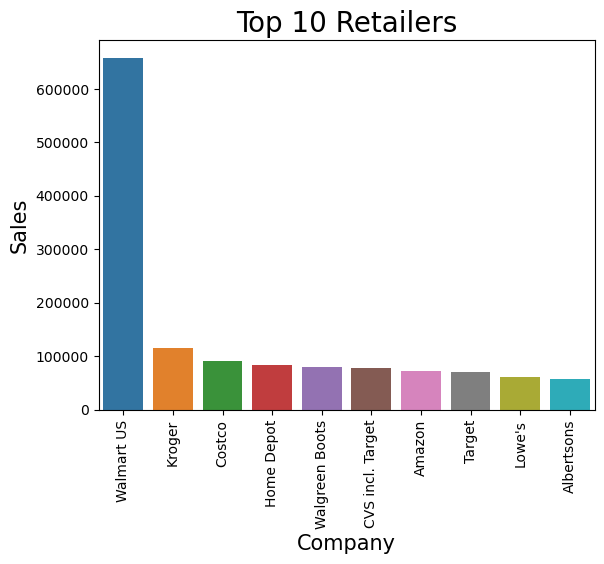

In [9]:
top_10_barplot = sns.barplot(data=sales_sorted_df[0:10], x="Company", y="Sales")

top_10_barplot.set_title("Top 10 Retailers", fontsize=20)
top_10_barplot.set_xlabel("Company", fontsize=15)
top_10_barplot.set_ylabel("Sales", fontsize=15 )
plt.xticks(rotation=90)

sns.set_context(rc={"figure.figsize": (18, 8)})

Top seller Walmart (658 billion) is more than five times bigger in than the second Kroger
Walmart and Kroger are the only retailers with more than 100 billion dollar sales.

Sales average of 71063 million is greatly affected by the dominant player Walmart, a better indicator would be taking Walmart out of the calculation

Understanding sales performance of this group of retailers requires always to take out Walmart due to its great dominance 

In [10]:
retailers_without_walmart_df = retailers_df[1::]


In [11]:
sales_mean= retailers_without_walmart_df["Sales"].mean()
print(f'Sales average without Walmart ${round(sales_mean)} USD millions')

Sales average without Walmart $46602 USD millions


In [12]:
sales_median= retailers_without_walmart_df["Sales"].median()
print(f'Sales median without Walmart ${round(sales_median)} USD millions')

Sales median without Walmart $34694 USD millions


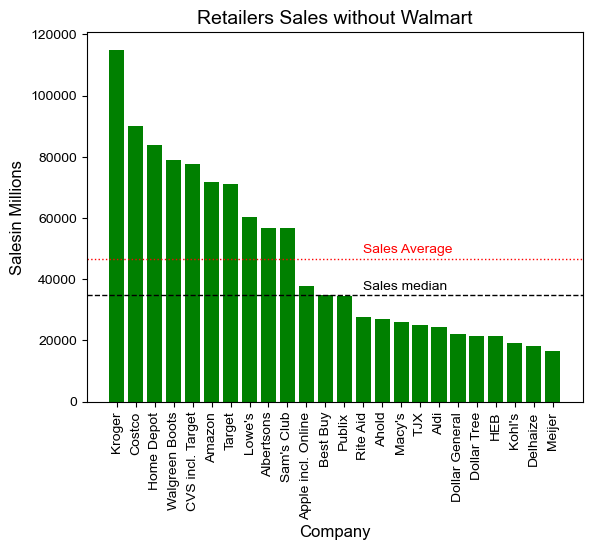

In [13]:
plt.bar(x=retailers_without_walmart_df["Company"], height=retailers_without_walmart_df["Sales"], color='g')
plt.title('Retailers Sales without Walmart', fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.xticks(rotation="vertical")
plt.ylabel("Salesin Millions", fontsize=12)
sns.set(rc = {'figure.figsize':(6,5)}, font_scale=0.8)

plt.axhline(sales_mean, color="red", linestyle="dotted", linewidth=1)
plt.text(
    x="Rite Aid",
    y=sales_mean + 2000,
    s="Sales Average",
    size=10,
    color="red",
)
plt.axhline(sales_median, color="black", linestyle="dashed", linewidth=1)
plt.text(
    x="Rite Aid",
    y=sales_median + 2000,
    s="Sales median",
    size=10,
    color="black",
)

plt.show()

In [14]:
total_sales = retailers_df['Sales'].sum()
total_sales

1776577

In [21]:
top_5_sales = retailers_df['Sales'][0:5].sum()
top_5_sales

1026104

In [22]:
percentage_of_top_5 =top_5_sales/total_sales *100
print(f'Percentage of top 5 of total sales {round(percentage_of_top_5)} %')

Percentage of top 5 of total sales 58 %


Top 5 Retailers account for almost 60% of total sales. There is a great dominance by the largest over all and the top 5 over the other 20

In [26]:
stores_mean   = retailers_df['Stores'].mean()
stores_median = retailers_df['Stores'].median()

print(f'The average of stores per company is {round(stores_mean)}')
print(f'The median of stores per company is {round(stores_median)}')


The average of stores per company is 3467
The median of stores per company is 1828


In [27]:
stores_sorted_df = retailers_df.sort_values("Stores", ascending=False)
retailers_without_stores = stores_sorted_df[pd.isna(stores_sorted_df["Stores"])]
retailers_without_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


Two companies sell products exclusively online. 

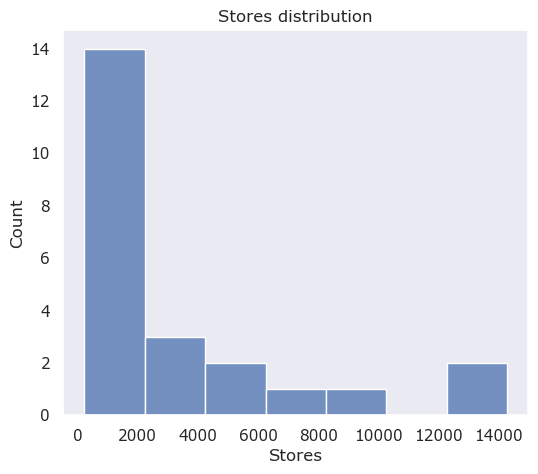

In [30]:
sns.set(style='dark', palette='deep', font='verdana', font_scale=1)
sns.histplot(retailers_df['Stores'])
plt.title('Stores distribution')
plt.show;

Average number of stores is 3467


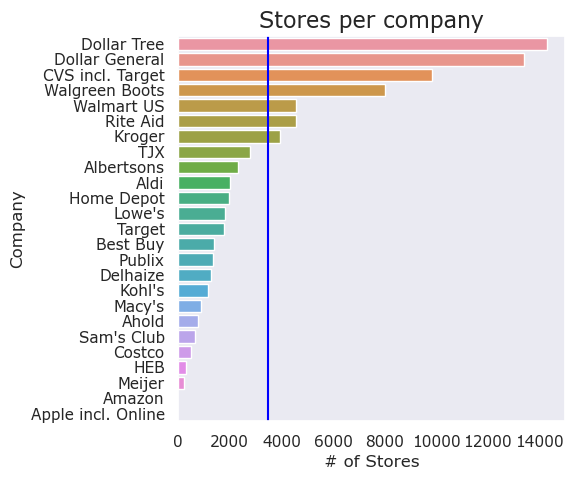

In [41]:
sorted_stores = retailers_df.sort_values('Stores', ascending=0)

stores_mean = round(sorted_stores['Stores'].mean())
print("Average number of stores is {}".format(stores_mean))


fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data = sorted_stores, x = 'Stores', y = 'Company')
ax.axvline(stores_mean, color = 'blue', linestyle = 'solid')


plt.title('Stores per company', fontsize = 16)
plt.xlabel('# of Stores');

Number of stores does not translate into more sales.Let's check correlation 

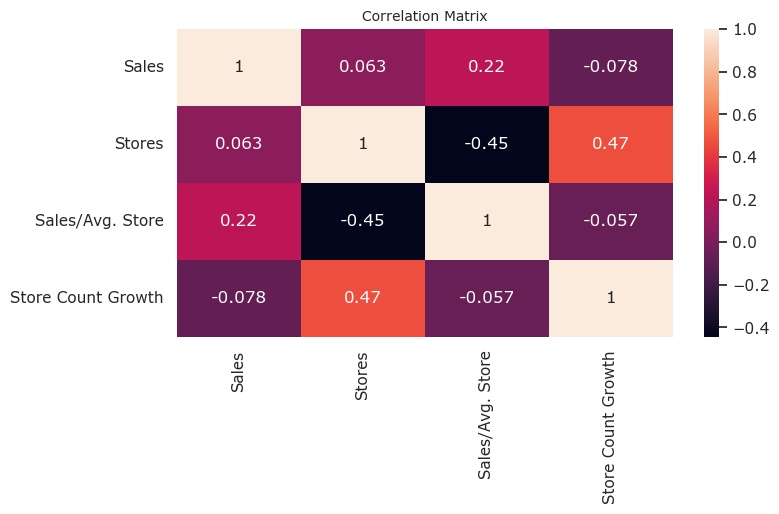

In [46]:
correlation = retailers_df.corr()
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(data = correlation, annot=True)

plt.title("Correlation Matrix", fontsize = 10);

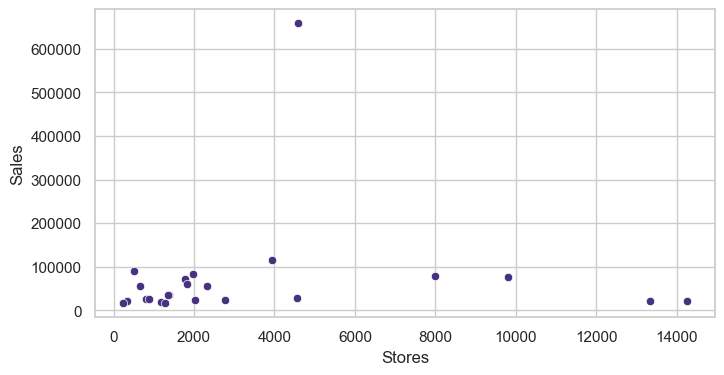

In [58]:
sns.set_theme(style='whitegrid',palette='viridis')
plt.figure(figsize=(8, 4))
sns.scatterplot(data=retailers_df, x='Stores', y= 'Sales');
#xlabel=Stores,ylabel=Sales

There is no correlation between sales and stores

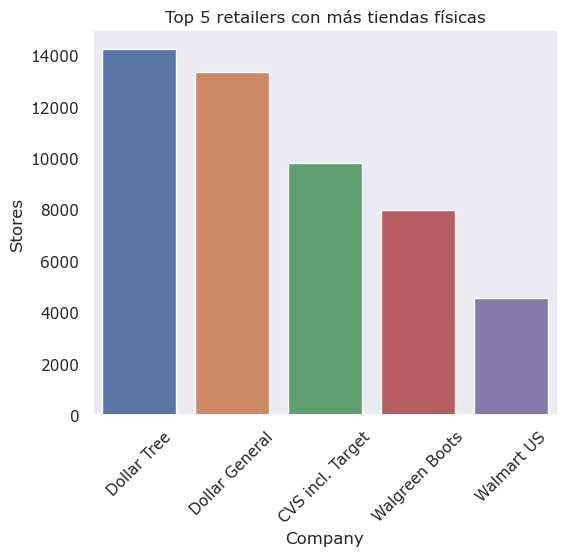

In [106]:
stores_top_5 = retailers_df.sort_values('Stores', ascending=0)[:5]
sns.set(style='dark', palette='deep', font='verdana', font_scale=1)

sns.barplot(data = stores_top_5,x='Company', y='Stores')
plt.title('Top 5 retailers con más tiendas físicas')
plt.xlabel('Company')
plt.ylabel('Stores')
plt.xticks(rotation=45)
plt.show();

In [70]:
sales_avgstores_df = retailers_df.copy()

sales_avgstores_df["Sales/Store"] = sales_avgstores_df["Sales"] / sales_avgstores_df["Stores"] 
sorted_sales_avgstores_df = sales_avgstores_df.sort_values("Sales/Store", ascending=False)

sorted_sales_avgstores_df


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Store
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840


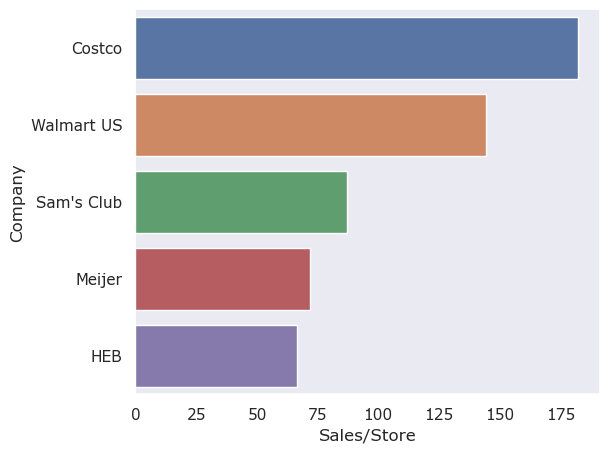

In [74]:
sales_avgstores_val = sorted_sales_avgstores_df["Sales/Store"][0:5]
sales_avgstores_company = sorted_sales_avgstores_df["Company"][0:5]

sns.barplot(x=sales_avgstores_val,y=sales_avgstores_company);



Costco despite being third in sales with relatively small number of stores, has the best sales per store performance

Let's explore categories

In [80]:
sales_by_category_df = retailers_df.filter(["Company", "Category","Sales"])

sales_by_category_df['Category'] = sales_by_category_df['Category'].replace(['Warehouse Clubs',],'Warehouse Club')
sales_by_category_df['Category'] = sales_by_category_df['Category'].fillna("Electronics")

sales_by_category_df

,Company,Category,Sales
0,Walmart US,Supercenters,658119
1,Kroger,Grocery,115037
2,Costco,Warehouse Club,90048
3,Home Depot,Home Improvement,83976
4,Walgreen Boots,Drug Stores,78924
5,CVS incl. Target,Drug Stores,77792
6,Amazon,Electronic/Mail Order,71687
7,Target,Supercenters,71208
8,Lowe's,Home Improvement,60311
9,Albertsons,Grocery,56829


In [96]:
sales_by_category_total = sales_by_category_df.groupby('Category')['Sales'].agg([sum]).reset_index()
sales_category_sorted = sales_by_category_total.sort_values('sum', ascending=0)


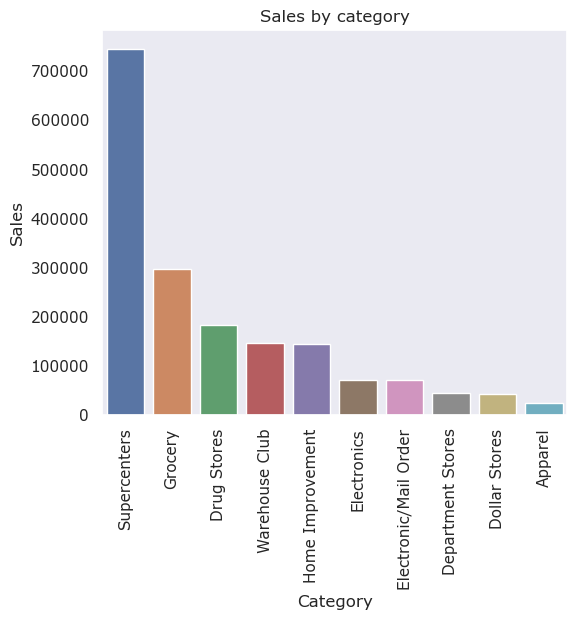

In [109]:
sns.set(style='dark', palette='deep', font='verdana', font_scale=1)


sns.barplot(data = sales_category_sorted, x='Category', y='sum')
plt.title('Sales by category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()